# Notes

In [1]:
import sys
sys.path.append('src/')


In [2]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow
import geopandas as gpd

# Data sources
from data_sources.specific.malaria_falciparum_cases_sivigila import MalariaFalciparumSivigila4
from data_sources.specific.malaria_vivax_cases_sivigila import MalariaVivaxSivigila4
from data_sources.specific.gold_export import GoldExport

import yfinance as yf

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder


# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer


# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.colombian_departments import ColombianDepartments

pd.set_option('display.max_rows', 100)



/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
included_sources = [MalariaFalciparumSivigila4]#, MalariaVivaxSivigila4, GoldExport]
included_matrix_sources =  []
#target_mobility_col = "fb_mobility_recent_movement"


flow1 = CustomFlow(ID = 'vivax_falciparum',
                    name = "Vivax and Falciparum",
                    time_resolution = MONTH,
                    geography= ColombianMunicipalities(),
                    vector_data_sources=included_sources,
                    matrix_data_sources=included_matrix_sources,
                    embedder=[IdentityEmbbeder()],
                    clusterer=IdentityClusterer())
                    #embedder=LinearRegressionCoefficientEmbedder(target_col=target_col),
                    #clusterer=SklearnVectorClusterer(ID="kmeans", name="K-Means", sklearn_clusterer= KMeans(n_clusters=5)))


flow1.run()

Starts Flow: Vivax and Falciparum
   Loads Initial Geography
   Loads Data
      Loads Vector Data
      Found 1 elements
         Extracts 1 of 1: Malaria falciparum (malaria_falciparum_sivigila_4) 
         Loads Data
         Builds Overlay
         By Dates. From 2006 to 2021
            2006-01-15T00:00:00.000000000
            2006-01-22T00:00:00.000000000
            2006-01-29T00:00:00.000000000
            2006-04-16T00:00:00.000000000
            2006-04-30T00:00:00.000000000
            2006-07-02T00:00:00.000000000
            2006-08-13T00:00:00.000000000
            2006-09-17T00:00:00.000000000
            2006-10-01T00:00:00.000000000
            2006-11-05T00:00:00.000000000
            2006-11-19T00:00:00.000000000
            2006-12-03T00:00:00.000000000
            2006-12-10T00:00:00.000000000
            2006-12-17T00:00:00.000000000
            2006-12-24T00:00:00.000000000
            2006-12-31T00:00:00.000000000
            2007-01-07T00:00:00.000000000
     

In [6]:
import geopandas

muni = geopandas.read_file("/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/municipalities/municipalities.shp")
muni

,muni_id,dep_name,muni_name,depto_id,geometry
0,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285..."
1,5475,Antioquia,Murindo,5,"POLYGON ((-76.67121 7.02387, -76.65716 7.01891..."
2,5480,Antioquia,Mutata,5,"POLYGON ((-76.49161 7.55006, -76.49154 7.55001..."
3,5266,Antioquia,Envigado,5,"POLYGON ((-75.48477 6.18982, -75.48123 6.18514..."
4,5483,Antioquia,Narino,5,"POLYGON ((-75.24353 5.68065, -75.22769 5.67609..."
...,...,...,...,...,...
1117,97889,Vaupes,Yavarate (Cor. Departamental),97,"POLYGON ((-69.99566 0.54662, -69.99568 0.54653..."
1118,99001,Vichada,Puerto Carreno,99,"POLYGON ((-67.77266 6.30879, -67.77266 6.30878..."
1119,99524,Vichada,La Primavera,99,"POLYGON ((-70.62617 4.76763, -70.62617 4.76755..."
1120,99624,Vichada,Santa Rosalia,99,"POLYGON ((-70.64148 5.39873, -70.64141 5.39879..."


In [8]:
dep = geopandas.read_file("/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/departments/departments.shp")
dep

,dep_name,depto_id,geometry
0,Amazonas,91,"POLYGON ((-70.49211 -2.47790, -70.49214 -2.477..."
1,Antioquia,5,"POLYGON ((-75.90445 5.48149, -75.90453 5.48153..."
2,Arauca,81,"POLYGON ((-69.73801 6.50079, -69.73799 6.50077..."
3,Archipielago De San Andres,88,"MULTIPOLYGON (((-81.69996 12.56728, -81.69987 ..."
4,Atlantico,8,"POLYGON ((-74.87195 10.32702, -74.87196 10.326..."
5,Bogota,11,"POLYGON ((-74.18447 4.64875, -74.17798 4.65505..."
6,Bolivar,13,"MULTIPOLYGON (((-76.17828 9.37686, -76.17836 9..."
7,Boyaca,15,"POLYGON ((-73.45045 4.88289, -73.45049 4.88281..."
8,Caldas,17,"POLYGON ((-75.33685 5.04534, -75.33280 5.04591..."
9,Caqueta,18,"POLYGON ((-75.49415 0.77235, -75.49421 0.77229..."


In [5]:

import geopandas
from shapely import wkt

df = pd.read_csv("temp.csv")
df['geometry'] = geopandas.GeoSeries.from_wkt(df['geometry'])
gdf = geopandas.GeoDataFrame(df, geometry='geometry')



/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

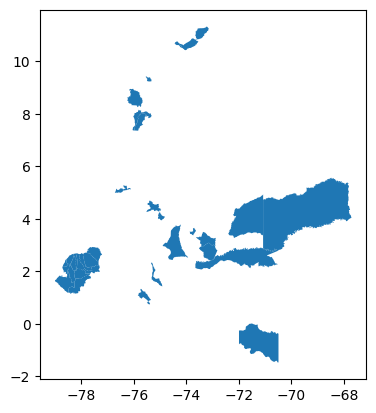

In [9]:
gdf.plot()

In [7]:
gdf[gdf.ID == 20001].plot()

AttributeError: 'GeoDataFrame' object has no attribute 'ID'

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

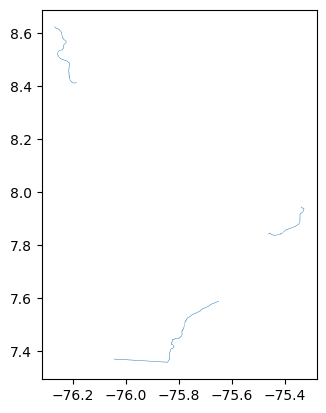

In [10]:
gdf[gdf.ID == 5].plot()

In [9]:
muni[muni.muni_id == 20001]

,muni_id,dep_name,muni_name,depto_id,geometry
381,20001,Cesar,Valledupar,20,"POLYGON ((-73.73498 9.90983, -73.74002 9.91899..."


In [19]:
res = geopandas.overlay(muni,
                muni,
                how='intersection',
                keep_geom_type=True)
res[AREA_COL] = res[GEOMETRY].to_crs(MANIPULATION_PROJECTION).area
r

,muni_id_1,dep_name_1,muni_name_1,depto_id_1,muni_id_2,dep_name_2,muni_name_2,depto_id_2,geometry,__polygon_area
0,5467,Antioquia,Montebello,5,5467,Antioquia,Montebello,5,"POLYGON ((-75.57272 6.02285, -75.57264 6.02287...",1.033029e+08
1,5607,Antioquia,Retiro,5,5467,Antioquia,Montebello,5,"POLYGON ((-75.50755 5.95950, -75.50763 5.95948...",2.978254e+06
2,5679,Antioquia,Santa Barbara,5,5467,Antioquia,Montebello,5,"POLYGON ((-75.58882 5.97509, -75.58379 5.97600...",3.646492e+06
3,5002,Antioquia,Abejorral,5,5467,Antioquia,Montebello,5,"POLYGON ((-75.52880 5.86868, -75.52874 5.86875...",3.032358e+06
4,5129,Antioquia,Caldas,5,5467,Antioquia,Montebello,5,"POLYGON ((-75.57127 6.02105, -75.58018 6.01749...",1.426683e+06
...,...,...,...,...,...,...,...,...,...,...
7693,97001,Vaupes,Mitu,97,97889,Vaupes,Yavarate (Cor. Departamental),97,"POLYGON ((-69.83597 1.07163, -69.83588 1.07160...",1.987929e+07
7694,97889,Vaupes,Yavarate (Cor. Departamental),97,97889,Vaupes,Yavarate (Cor. Departamental),97,"POLYGON ((-69.99568 0.54653, -69.99571 0.54645...",4.744017e+09
7695,99001,Vichada,Puerto Carreno,99,99001,Vichada,Puerto Carreno,99,"POLYGON ((-67.77266 6.30878, -67.76978 6.29877...",1.237817e+10
7696,99524,Vichada,La Primavera,99,99001,Vichada,Puerto Carreno,99,"POLYGON ((-68.82016 6.17855, -68.82012 6.17853...",1.717972e+07


<AxesSubplot:>

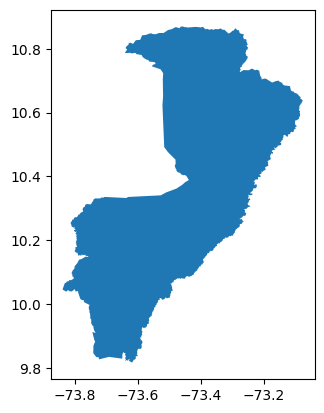

In [14]:
muni[muni.muni_id == 20001].plot()

In [21]:
temp = res[res.muni_id_1 == 20001].copy()
temp[AREA_COL] = 100*temp[AREA_COL]/temp[AREA_COL].sum()
temp

,muni_id_1,dep_name_1,muni_name_1,depto_id_1,muni_id_2,dep_name_2,muni_name_2,depto_id_2,geometry,__polygon_area
4160,20001,Cesar,Valledupar,20,20001,Cesar,Valledupar,20,"POLYGON ((-73.74002 9.91899, -73.74006 9.91906...",97.888314
4174,20001,Cesar,Valledupar,20,20060,Cesar,Bosconia,20,"POLYGON ((-73.74002 9.91899, -73.74006 9.91906...",0.151943
4180,20001,Cesar,Valledupar,20,20238,Cesar,El Copey,20,"POLYGON ((-73.81907 10.07519, -73.81901 10.075...",0.221670
4187,20001,Cesar,Valledupar,20,20250,Cesar,El Paso,20,"POLYGON ((-73.61861 9.81767, -73.61869 9.81765...",0.121005
4199,20001,Cesar,Valledupar,20,20570,Cesar,Pueblo Bello,20,"POLYGON ((-73.73687 10.33103, -73.73680 10.331...",0.378007
4204,20001,Cesar,Valledupar,20,20621,Cesar,La Paz,20,"MULTIPOLYGON (((-73.17721 10.45703, -73.17717 ...",0.137905
4211,20001,Cesar,Valledupar,20,20750,Cesar,San Diego,20,"POLYGON ((-73.23358 10.35761, -73.23359 10.357...",0.438302
4214,20001,Cesar,Valledupar,20,44090,Guajira,Dibulla,44,"POLYGON ((-73.58730 10.84141, -73.58727 10.841...",0.067824
4220,20001,Cesar,Valledupar,20,44420,Guajira,La Jagua Del Pilar,44,"POLYGON ((-73.16026 10.48823, -73.16033 10.488...",0.031584
4225,20001,Cesar,Valledupar,20,44650,Guajira,San Juan Del Cesar,44,"POLYGON ((-73.46446 10.86872, -73.46443 10.868...",0.325789
